In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [21]:
data = pd.read_csv("Mall_Customers.csv")

In [22]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
data.shape

(200, 5)

In [25]:
# Selecting relevant features for clustering (Age, Annual Income)
X = data.iloc[:, [2, 3]].values

In [26]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

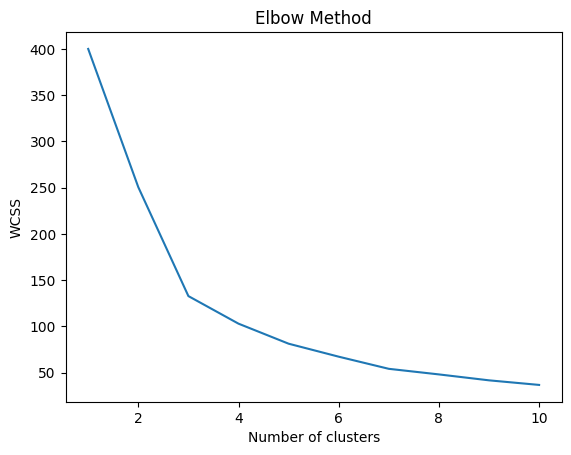

In [28]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # WCSS stands for "Within-Cluster Sum of Squares"
plt.show()

In [29]:
# Based on the Elbow Method, let's choose the number of clusters as 4
num_clusters = 3

In [30]:
# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=0)

In [31]:

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

In [32]:

# Display the number of customers in each cluster
print(data['Cluster'].value_counts())

2    76
0    62
1    62
Name: Cluster, dtype: int64


In [33]:
# Visualize the clusters using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

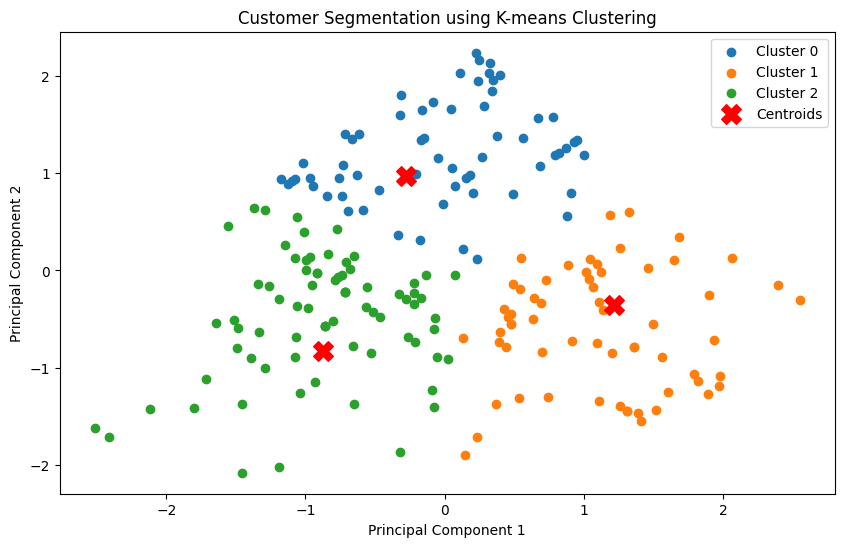

In [34]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(data[data['Cluster'] == cluster]['PCA1'],
                data[data['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()